A continuación, se presenta el código para construir modelos de promedios móviles para la compañía X.

In [107]:
#Instalar paqueteria Pandas

#pip install pandas

import pandas as pd

In [108]:
from sklearn.metrics import mean_absolute_error 

In [109]:
from sklearn.metrics import mean_squared_error

In [110]:
from sklearn.metrics import r2_score

In [111]:
import matplotlib.pyplot as plt

In [112]:
datos = pd.read_csv("datos_completosE3.csv")

In [113]:
datos.head(10)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,ventas_totales_en_tienda_de_cada_mes,ventas_promedio_en_tienda_de_cada_mes,ventas_totales_en_tienda_de_cada_sku,ventas_promedio_en_tienda_de_cada_sku,ventas_totales_1_mes_pasado,...,ventas_totales_tienda_y_mes_3_pasado,ventas_promedio_tienda_y_mes_del_mes_pasado,ventas_promedio_tienda_y_mes_2_pasado,ventas_promedio_tienda_y_mes_3_pasado,ventas_totales_tienda_y_sku_del_mes_pasado,ventas_totales_tienda_y_sku_2_pasado,ventas_totales_tienda_y_sku_3_pasado,ventas_promedio_tienda_y_sku_del_mes_pasado,ventas_promedio_tienda_y_sku_2_pasado,ventas_promedio_tienda_y_sku_3_pasado
0,1,0,1,0,1,0,0.000000,0,0.000000,0,...,0,0.000000,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000
1,1,1,1,1,1,1,0.035714,60,0.039139,0,...,0,0.000000,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000
2,1,2,1,1,1,5,0.178571,186,0.121331,1,...,0,0.035714,0.000000,0.000000,60,0,0,0.039139,0.000000,0.000000
3,1,3,1,1,0,5,0.178571,82,0.053490,1,...,0,0.178571,0.035714,0.000000,186,60,0,0.121331,0.039139,0.000000
4,1,4,1,0,0,0,0.000000,12,0.007828,1,...,1,0.178571,0.178571,0.035714,82,186,60,0.053490,0.121331,0.039139
5,1,5,1,0,0,2,0.071429,5,0.003262,0,...,5,0.000000,0.178571,0.178571,12,82,186,0.007828,0.053490,0.121331
6,1,6,1,0,0,2,0.071429,18,0.011742,0,...,5,0.071429,0.000000,0.178571,5,12,82,0.003262,0.007828,0.053490
7,1,7,1,0,0,0,0.000000,4,0.002609,0,...,0,0.071429,0.071429,0.000000,18,5,12,0.011742,0.003262,0.007828
8,1,8,1,0,0,0,0.000000,7,0.004566,0,...,2,0.000000,0.071429,0.071429,4,18,5,0.002609,0.011742,0.003262
9,1,0,2,0,0,0,0.000000,368,0.240052,0,...,0,0.000000,0.000000,0.000000,368,368,368,0.240052,0.240052,0.240052


In [114]:
datos.shape

(386316, 24)

In [115]:
datos.columns

Index(['pdv_id', 'mes_id', 'sku_id', 'ventas_totales',
       'y_ventas_siguiente_mes', 'ventas_totales_en_tienda_de_cada_mes',
       'ventas_promedio_en_tienda_de_cada_mes',
       'ventas_totales_en_tienda_de_cada_sku',
       'ventas_promedio_en_tienda_de_cada_sku', 'ventas_totales_1_mes_pasado',
       'ventas_totales_2_meses_pasados', 'ventas_totales_3_meses_pasados',
       'ventas_totales_tienda_y_mes_del_mes_pasado',
       'ventas_totales_tienda_y_mes_2_pasado',
       'ventas_totales_tienda_y_mes_3_pasado',
       'ventas_promedio_tienda_y_mes_del_mes_pasado',
       'ventas_promedio_tienda_y_mes_2_pasado',
       'ventas_promedio_tienda_y_mes_3_pasado',
       'ventas_totales_tienda_y_sku_del_mes_pasado',
       'ventas_totales_tienda_y_sku_2_pasado',
       'ventas_totales_tienda_y_sku_3_pasado',
       'ventas_promedio_tienda_y_sku_del_mes_pasado',
       'ventas_promedio_tienda_y_sku_2_pasado',
       'ventas_promedio_tienda_y_sku_3_pasado'],
      dtype='object')

In [116]:
datos_E3 = datos.drop(['ventas_totales_en_tienda_de_cada_mes',
       'ventas_promedio_en_tienda_de_cada_mes',
       'ventas_totales_en_tienda_de_cada_sku',
       'ventas_promedio_en_tienda_de_cada_sku', 'ventas_totales_1_mes_pasado',
       'ventas_totales_2_meses_pasados', 'ventas_totales_3_meses_pasados',
       'ventas_totales_tienda_y_mes_del_mes_pasado',
       'ventas_totales_tienda_y_mes_2_pasado',
       'ventas_totales_tienda_y_mes_3_pasado',
       'ventas_promedio_tienda_y_mes_del_mes_pasado',
       'ventas_promedio_tienda_y_mes_2_pasado',
       'ventas_promedio_tienda_y_mes_3_pasado',
       'ventas_totales_tienda_y_sku_del_mes_pasado',
       'ventas_totales_tienda_y_sku_2_pasado',
       'ventas_totales_tienda_y_sku_3_pasado',
       'ventas_promedio_tienda_y_sku_del_mes_pasado',
       'ventas_promedio_tienda_y_sku_2_pasado',
       'ventas_promedio_tienda_y_sku_3_pasado'], axis=1)

In [117]:
datos_E3.head(10)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes
0,1,0,1,0,1
1,1,1,1,1,1
2,1,2,1,1,1
3,1,3,1,1,0
4,1,4,1,0,0
5,1,5,1,0,0
6,1,6,1,0,0
7,1,7,1,0,0
8,1,8,1,0,0
9,1,0,2,0,0


In [118]:
# Pedir lo del mes anteior
datos_E3['m1_pedir_lo_del_mes_pasado'] = datos_E3['ventas_totales']

In [119]:
datos_E3.head(16)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado
0,1,0,1,0,1,0
1,1,1,1,1,1,1
2,1,2,1,1,1,1
3,1,3,1,1,0,1
4,1,4,1,0,0,0
5,1,5,1,0,0,0
6,1,6,1,0,0,0
7,1,7,1,0,0,0
8,1,8,1,0,0,0
9,1,0,2,0,0,0


In [120]:
# Pedir un promedio de los 2 meses anteriores 
datos_E3['m2_promedio_de_dos_meses_anteriores'] = datos_E3.groupby(['pdv_id','sku_id']).rolling(2)['ventas_totales'].mean().reset_index(drop=True)

In [121]:
datos_E3.head(16)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores
0,1,0,1,0,1,0,NaN
1,1,1,1,1,1,1,0.5
2,1,2,1,1,1,1,1.0
3,1,3,1,1,0,1,1.0
4,1,4,1,0,0,0,0.5
5,1,5,1,0,0,0,0.0
6,1,6,1,0,0,0,0.0
7,1,7,1,0,0,0,0.0
8,1,8,1,0,0,0,0.0
9,1,0,2,0,0,0,NaN


In [122]:
# Pedir un promedio de los 3 meses anteriores 
datos_E3['m3_promedio_de_tres_meses_anteriores'] = datos_E3.groupby(['pdv_id','sku_id']).rolling(3)['ventas_totales'].mean().reset_index(drop=True)
datos_E3.head(45)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
0,1,0,1,0,1,0,NaN,NaN
1,1,1,1,1,1,1,0.5,NaN
2,1,2,1,1,1,1,1.0,0.666667
3,1,3,1,1,0,1,1.0,1.000000
4,1,4,1,0,0,0,0.5,0.666667
5,1,5,1,0,0,0,0.0,0.333333
6,1,6,1,0,0,0,0.0,0.000000
7,1,7,1,0,0,0,0.0,0.000000
8,1,8,1,0,0,0,0.0,0.000000
9,1,0,2,0,0,0,NaN,NaN


In [123]:
siguiente_mes = datos_E3['mes_id'] == 8
siguiente_mes.head()


0    False
1    False
2    False
3    False
4    False
Name: mes_id, dtype: bool

In [124]:
pronostico = datos_E3[siguiente_mes]
pronostico.head(45)


,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
8,1,8,1,0,0,0,0.0,0.000000
17,1,8,2,0,0,0,0.0,0.000000
26,1,8,3,0,0,0,0.0,0.000000
35,1,8,4,0,0,0,0.0,0.000000
44,1,8,5,0,0,0,0.0,0.333333
53,1,8,6,0,0,0,0.0,0.000000
62,1,8,7,0,0,0,0.0,0.333333
71,1,8,8,0,0,0,0.0,0.000000
80,1,8,9,0,0,0,0.0,0.000000
89,1,8,10,0,0,0,0.0,0.000000


In [125]:
error_julio= datos_E3[datos_E3.mes_id == 0]
error_julio.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
0,1,0,1,0,1,0,NaN,NaN
9,1,0,2,0,0,0,NaN,NaN
18,1,0,3,0,0,0,NaN,NaN
27,1,0,4,0,0,0,NaN,NaN
36,1,0,5,0,0,0,NaN,NaN


In [126]:
error_agosto= datos_E3[datos_E3.mes_id == 1]
error_agosto.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
1,1,1,1,1,1,1,0.5,NaN
10,1,1,2,0,2,0,0.0,NaN
19,1,1,3,0,2,0,0.0,NaN
28,1,1,4,0,0,0,0.0,NaN
37,1,1,5,0,0,0,0.0,NaN


In [127]:
error_septiembre= datos_E3[datos_E3.mes_id == 2]
error_septiembre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
2,1,2,1,1,1,1,1.0,0.666667
11,1,2,2,2,0,2,1.0,0.666667
20,1,2,3,2,3,2,1.0,0.666667
29,1,2,4,0,1,0,0.0,0.000000
38,1,2,5,0,0,0,0.0,0.000000


In [128]:
error_octubre= datos_E3[datos_E3.mes_id == 3]
error_octubre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
3,1,3,1,1,0,1,1.0,1.000000
12,1,3,2,0,0,0,1.0,0.666667
21,1,3,3,3,0,3,2.5,1.666667
30,1,3,4,1,0,1,0.5,0.333333
39,1,3,5,0,0,0,0.0,0.000000


In [129]:
error_noviembre= datos_E3[datos_E3.mes_id == 4]
error_noviembre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
4,1,4,1,0,0,0,0.5,0.666667
13,1,4,2,0,0,0,0.0,0.666667
22,1,4,3,0,0,0,1.5,1.666667
31,1,4,4,0,0,0,0.5,0.333333
40,1,4,5,0,1,0,0.0,0.000000


In [130]:
error_diciembre= datos_E3[datos_E3.mes_id == 5]
error_diciembre.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
5,1,5,1,0,0,0,0.0,0.333333
14,1,5,2,0,0,0,0.0,0.000000
23,1,5,3,0,0,0,0.0,1.000000
32,1,5,4,0,0,0,0.0,0.333333
41,1,5,5,1,1,1,0.5,0.333333


In [131]:
error_enero= datos_E3[datos_E3.mes_id == 6]
error_enero.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
6,1,6,1,0,0,0,0.0,0.000000
15,1,6,2,0,0,0,0.0,0.000000
24,1,6,3,0,0,0,0.0,0.000000
33,1,6,4,0,0,0,0.0,0.000000
42,1,6,5,1,0,1,1.0,0.666667


In [132]:
error_febrero= datos_E3[datos_E3.mes_id == 7]
error_febrero.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
7,1,7,1,0,0,0,0.0,0.000000
16,1,7,2,0,0,0,0.0,0.000000
25,1,7,3,0,0,0,0.0,0.000000
34,1,7,4,0,0,0,0.0,0.000000
43,1,7,5,0,0,0,0.5,0.666667


In [133]:
error_febrero.shape

(42924, 8)

In [134]:
error_marzo= datos_E3[datos_E3.mes_id == 8]
error_marzo.head(5)

,pdv_id,mes_id,sku_id,ventas_totales,y_ventas_siguiente_mes,m1_pedir_lo_del_mes_pasado,m2_promedio_de_dos_meses_anteriores,m3_promedio_de_tres_meses_anteriores
8,1,8,1,0,0,0,0.0,0.000000
17,1,8,2,0,0,0,0.0,0.000000
26,1,8,3,0,0,0,0.0,0.000000
35,1,8,4,0,0,0,0.0,0.000000
44,1,8,5,0,0,0,0.0,0.333333


In [135]:
error_marzo.shape

(42924, 8)

In [136]:
#cálculo manual 
#sum(abs(error_julio['y_ventas_siguiente_mes'] - error_julio['m1_pedir_lo_del_mes_pasado']))/42924

In [137]:
error_m1_julio = mean_absolute_error(error_julio['y_ventas_siguiente_mes'], error_julio['m1_pedir_lo_del_mes_pasado'])
error_m2_julio = None
error_m3_julio = None

error_m1_julio2 =  mean_squared_error(error_julio['y_ventas_siguiente_mes'], error_julio['m1_pedir_lo_del_mes_pasado'])
error_m1_julio3 = r2_score(error_julio['y_ventas_siguiente_mes'], error_julio['m1_pedir_lo_del_mes_pasado'])

error_m2_julio2 =  None
error_m2_julio3 = None

error_m3_julio2 =  None
error_m3_julio3 = None

In [138]:
error_m1_agosto = mean_absolute_error(error_agosto['y_ventas_siguiente_mes'], error_agosto['m1_pedir_lo_del_mes_pasado'])
error_m2_agosto = mean_absolute_error(error_agosto['y_ventas_siguiente_mes'], error_agosto['m2_promedio_de_dos_meses_anteriores'])
error_m3_agosto = None
error_m1_agosto2 =  mean_squared_error(error_agosto['y_ventas_siguiente_mes'], error_agosto['m1_pedir_lo_del_mes_pasado'])
error_m1_agosto3 = r2_score(error_agosto['y_ventas_siguiente_mes'], error_agosto['m1_pedir_lo_del_mes_pasado'])

error_m2_agosto2 =  mean_squared_error(error_agosto['y_ventas_siguiente_mes'], error_agosto['m2_promedio_de_dos_meses_anteriores'])
error_m2_agosto3 = r2_score(error_agosto['y_ventas_siguiente_mes'], error_agosto['m2_promedio_de_dos_meses_anteriores'])

error_m3_agosto2 = None
error_m3_agosto3 = None


In [139]:
error_m1_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m1_pedir_lo_del_mes_pasado'])
error_m2_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m2_promedio_de_dos_meses_anteriores'])
error_m3_septiembre = mean_absolute_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m3_promedio_de_tres_meses_anteriores'])
error_m1_septiembre2 =  mean_squared_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m1_pedir_lo_del_mes_pasado'])
error_m1_septiembre3 = r2_score(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m1_pedir_lo_del_mes_pasado'])

error_m2_septiembre2 =  mean_squared_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m2_promedio_de_dos_meses_anteriores'])
error_m2_septiembre3 = r2_score(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m2_promedio_de_dos_meses_anteriores'])

error_m3_septiembre2 =  mean_squared_error(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m3_promedio_de_tres_meses_anteriores'])
error_m3_septiembre3 = r2_score(error_septiembre['y_ventas_siguiente_mes'], error_septiembre['m3_promedio_de_tres_meses_anteriores'])

In [140]:
error_m1_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m1_pedir_lo_del_mes_pasado'])
error_m2_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m2_promedio_de_dos_meses_anteriores'])
error_m3_octubre = mean_absolute_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m3_promedio_de_tres_meses_anteriores'])
error_m1_octubre2 =  mean_squared_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m1_pedir_lo_del_mes_pasado'])
error_m1_octubre3 = r2_score(error_octubre['y_ventas_siguiente_mes'], error_octubre['m1_pedir_lo_del_mes_pasado'])

error_m2_octubre2 =  mean_squared_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m2_promedio_de_dos_meses_anteriores'])
error_m2_octubre3 = r2_score(error_octubre['y_ventas_siguiente_mes'], error_octubre['m2_promedio_de_dos_meses_anteriores'])

error_m3_octubre2 =  mean_squared_error(error_octubre['y_ventas_siguiente_mes'], error_octubre['m3_promedio_de_tres_meses_anteriores'])
error_m3_octubre3 = r2_score(error_octubre['y_ventas_siguiente_mes'], error_octubre['m3_promedio_de_tres_meses_anteriores'])

In [141]:
error_m1_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m1_pedir_lo_del_mes_pasado'])
error_m2_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m2_promedio_de_dos_meses_anteriores'])
error_m3_noviembre = mean_absolute_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m3_promedio_de_tres_meses_anteriores'])
error_m1_noviembre2 =  mean_squared_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m1_pedir_lo_del_mes_pasado'])
error_m1_noviembre3 = r2_score(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m1_pedir_lo_del_mes_pasado'])

error_m2_noviembre2 =  mean_squared_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m2_promedio_de_dos_meses_anteriores'])
error_m2_noviembre3 = r2_score(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m2_promedio_de_dos_meses_anteriores'])

error_m3_noviembre2 =  mean_squared_error(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m3_promedio_de_tres_meses_anteriores'])
error_m3_noviembre3 = r2_score(error_noviembre['y_ventas_siguiente_mes'], error_noviembre['m3_promedio_de_tres_meses_anteriores'])


In [142]:
error_m1_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m1_pedir_lo_del_mes_pasado'])
error_m2_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m2_promedio_de_dos_meses_anteriores'])
error_m3_diciembre = mean_absolute_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m3_promedio_de_tres_meses_anteriores'])
error_m1_diciembre2 =  mean_squared_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m1_pedir_lo_del_mes_pasado'])
error_m1_diciembre3 = r2_score(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m1_pedir_lo_del_mes_pasado'])

error_m2_diciembre2 =  mean_squared_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m2_promedio_de_dos_meses_anteriores'])
error_m2_diciembre3 = r2_score(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m2_promedio_de_dos_meses_anteriores'])

error_m3_diciembre2 =  mean_squared_error(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m3_promedio_de_tres_meses_anteriores'])
error_m3_diciembre3 = r2_score(error_diciembre['y_ventas_siguiente_mes'], error_diciembre['m3_promedio_de_tres_meses_anteriores'])

In [143]:
error_m1_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m1_pedir_lo_del_mes_pasado'])
error_m2_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m2_promedio_de_dos_meses_anteriores'])
error_m3_enero = mean_absolute_error(error_enero['y_ventas_siguiente_mes'], error_enero['m3_promedio_de_tres_meses_anteriores'])
error_m1_enero2 =  mean_squared_error(error_enero['y_ventas_siguiente_mes'], error_enero['m1_pedir_lo_del_mes_pasado'])
error_m1_enero3 = r2_score(error_enero['y_ventas_siguiente_mes'], error_enero['m1_pedir_lo_del_mes_pasado'])

error_m2_enero2 =  mean_squared_error(error_enero['y_ventas_siguiente_mes'], error_enero['m2_promedio_de_dos_meses_anteriores'])
error_m2_enero3 = r2_score(error_enero['y_ventas_siguiente_mes'], error_enero['m2_promedio_de_dos_meses_anteriores'])

error_m3_enero2 =  mean_squared_error(error_enero['y_ventas_siguiente_mes'], error_enero['m3_promedio_de_tres_meses_anteriores'])
error_m3_enero3 = r2_score(error_enero['y_ventas_siguiente_mes'], error_enero['m3_promedio_de_tres_meses_anteriores'])

In [144]:
error_m1_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m1_pedir_lo_del_mes_pasado'])
error_m2_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m2_promedio_de_dos_meses_anteriores'])
error_m3_febrero = mean_absolute_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m3_promedio_de_tres_meses_anteriores'])
error_m1_febrero2 =  mean_squared_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m1_pedir_lo_del_mes_pasado'])
error_m1_febrero3 = r2_score(error_febrero['y_ventas_siguiente_mes'], error_febrero['m1_pedir_lo_del_mes_pasado'])

error_m2_febrero2 =  mean_squared_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m2_promedio_de_dos_meses_anteriores'])
error_m2_febrero3 = r2_score(error_febrero['y_ventas_siguiente_mes'], error_febrero['m2_promedio_de_dos_meses_anteriores'])

error_m3_febrero2 =  mean_squared_error(error_febrero['y_ventas_siguiente_mes'], error_febrero['m3_promedio_de_tres_meses_anteriores'])
error_m3_febrero3 = r2_score(error_febrero['y_ventas_siguiente_mes'], error_febrero['m3_promedio_de_tres_meses_anteriores'])

In [145]:
error_m1_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m1_pedir_lo_del_mes_pasado'])
error_m2_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m2_promedio_de_dos_meses_anteriores'])
error_m3_marzo = mean_absolute_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m3_promedio_de_tres_meses_anteriores'])
error_m1_marzo2 =  mean_squared_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m1_pedir_lo_del_mes_pasado'])
error_m1_marzo3 = r2_score(error_marzo['y_ventas_siguiente_mes'], error_marzo['m1_pedir_lo_del_mes_pasado'])

error_m2_marzo2 =  mean_squared_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m2_promedio_de_dos_meses_anteriores'])
error_m2_marzo3 = r2_score(error_marzo['y_ventas_siguiente_mes'], error_marzo['m2_promedio_de_dos_meses_anteriores'])

error_m3_marzo2 =  mean_squared_error(error_marzo['y_ventas_siguiente_mes'], error_marzo['m3_promedio_de_tres_meses_anteriores'])
error_m3_marzo3 = r2_score(error_marzo['y_ventas_siguiente_mes'], error_marzo['m3_promedio_de_tres_meses_anteriores'])

In [146]:
errores_mae = [['Julio', error_m1_julio, error_m2_julio, error_m3_julio],
               ['Agosto', error_m1_agosto, error_m2_agosto, error_m3_agosto],
               ['Septiembre', error_m1_septiembre, error_m2_septiembre, error_m3_septiembre],
               ['Octubre', error_m1_octubre, error_m2_octubre, error_m3_octubre],
               ['Noviembre', error_m1_noviembre, error_m2_noviembre, error_m3_noviembre],
               ['Diciembre', error_m1_diciembre, error_m2_diciembre, error_m3_diciembre],
               ['Enero', error_m1_enero, error_m2_enero, error_m3_enero],
               ['Febrero', error_m1_febrero, error_m2_febrero, error_m3_febrero],
               ['Marzo', error_m1_marzo, error_m2_marzo, error_m3_marzo]
              ]
mae = pd.DataFrame(errores_mae, columns = ['Mes', 'mae_pedir_anterior','mae_promedio_2_meses_anteriores','mae_promedio_3_meses_anteriores'])
mae

#errores_mse = [['Julio', error_m1_julio2, error_m2_julio2, error_m3_julio2],
               #['Agosto', error_m1_agosto2, error_m2_agosto2, error_m3_agosto2],
               #['Septiembre', error_m1_septiembre2, error_m2_septiembre2, error_m3_septiembre2],
               #['Octubre', error_m1_octubre2, error_m2_octubre2, error_m3_octubre2],
               #['Noviembre', error_m1_noviembre2, error_m2_noviembre2, error_m3_noviembre2],
               #['Diciembre', error_m1_diciembre2, error_m2_diciembre2, error_m3_diciembre2],
               #['Enero', error_m1_enero2, error_m2_enero2, error_m3_enero2],
               #['Febrero', error_m1_febrero2, error_m2_febrero2, error_m3_febrero2],
               #['Marzo', error_m1_marzo2, error_m2_marzo2, error_m3_marzo2]
              #]
#mse = pd.DataFrame(errores_mse, columns = ['Mes', 'mse_pedir_anterior','mse_promedio_2_meses_anteriores','mse_promedio_3_meses_anteriores'])
#mse

#errores_rmse = [['Julio', error_m1_julio3, error_m2_julio3, error_m3_julio3],
               #['Agosto', error_m1_agosto3, error_m2_agosto3, error_m3_agosto3],
               #['Septiembre', error_m1_septiembre3, error_m2_septiembre3, error_m3_septiembre3],
               #['Octubre', error_m1_octubre3, error_m2_octubre3, error_m3_octubre3],
               #['Noviembre', error_m1_noviembre3, error_m2_noviembre3, error_m3_noviembre3],
               #['Diciembre', error_m1_diciembre3, error_m2_diciembre3, error_m3_diciembre3],
               #['Enero', error_m1_enero3, error_m2_enero3, error_m3_enero3],
               #['Febrero', error_m1_febrero3, error_m2_febrero3, error_m3_febrero3],
               #['Marzo', error_m1_marzo3, error_m2_marzo3, error_m3_marzo3]
              #]
#rmse = pd.DataFrame(errores_rmse, columns = ['Mes', 'rmse_pedir_anterior','rmse_promedio_2_meses_anteriores','rmse_promedio_3_meses_anteriores'])
#rmse

,Mes,mae_pedir_anterior,mae_promedio_2_meses_anteriores,mae_promedio_3_meses_anteriores
0,Julio,0.127924,NaN,NaN
1,Agosto,0.176847,0.153399,NaN
2,Septiembre,0.134424,0.150114,0.144278
3,Octubre,0.108471,0.112315,0.111197
4,Noviembre,0.033058,0.067678,0.084296
5,Diciembre,0.046710,0.044625,0.061403
6,Enero,0.066420,0.062587,0.060945
7,Febrero,0.054352,0.048097,0.042991
8,Marzo,0.026908,0.043507,0.044715


Text(0.5, 1.0, 'Error Absoluto Total en Modelos Base')

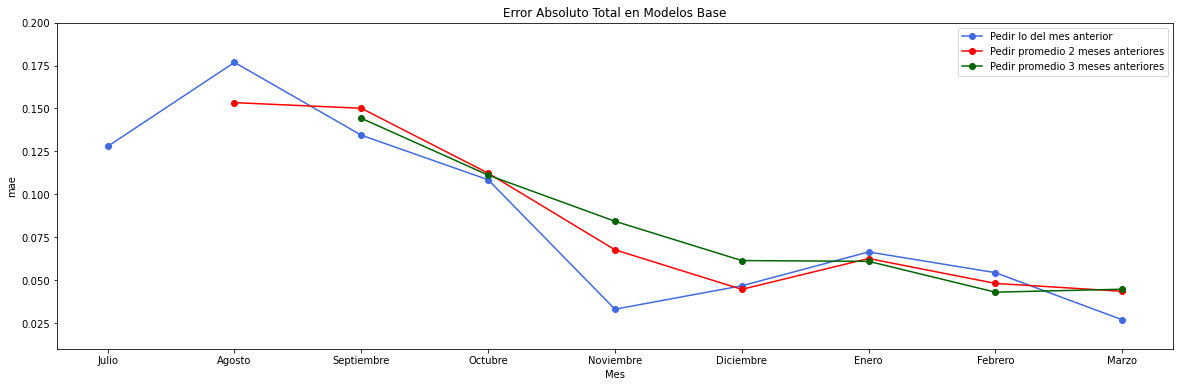

In [147]:
plt.figure(figsize=(20,6)) #impresión de la figura
plt.plot(mae.Mes, mae.mae_pedir_anterior,'-o',color="royalblue")
plt.plot(mae.Mes, mae.mae_promedio_2_meses_anteriores, '-o', color="red")
plt.plot(mae.Mes, mae.mae_promedio_3_meses_anteriores, '-o', color="darkgreen")
plt.legend(['Pedir lo del mes anterior','Pedir promedio 2 meses anteriores','Pedir promedio 3 meses anteriores'])
plt.ylim(0.01, 0.2)
plt.ylabel('mae')
plt.xlabel('Mes')
plt.title('Error Absoluto Total en Modelos Base')

Text(0.5, 1.0, 'Error Absoluto Total en Modelos Base - opción 2')

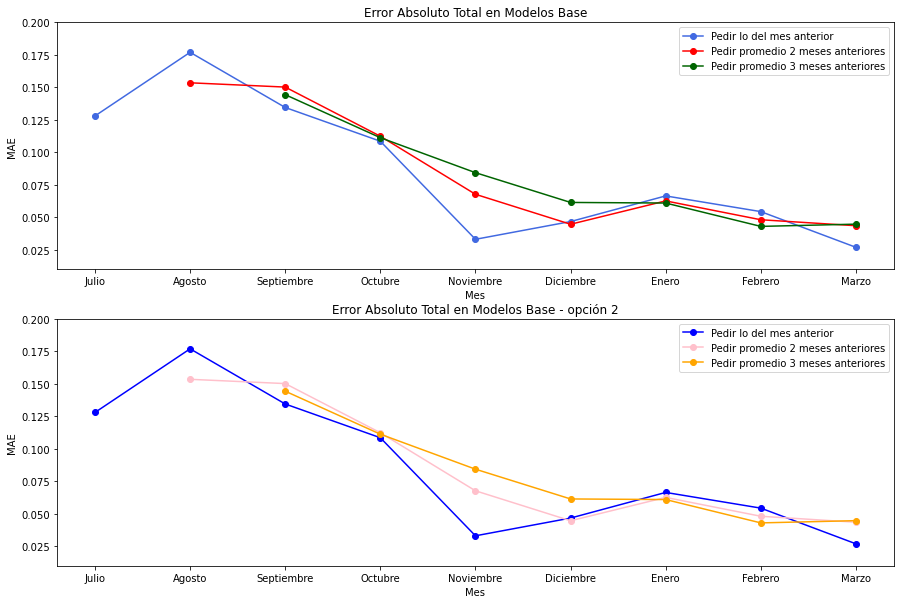

In [148]:
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
plt.plot(mae.Mes, mae.mae_pedir_anterior,'-o',color="royalblue")
plt.plot(mae.Mes, mae.mae_promedio_2_meses_anteriores, '-o', color="red")
plt.plot(mae.Mes, mae.mae_promedio_3_meses_anteriores, '-o', color="darkgreen")
plt.legend(['Pedir lo del mes anterior','Pedir promedio 2 meses anteriores','Pedir promedio 3 meses anteriores'])
plt.ylim(0.01, 0.2)
plt.ylabel('MAE')
plt.xlabel('Mes')
plt.title('Error Absoluto Total en Modelos Base')

plt.subplot(2,1,2)
plt.plot(mae.Mes, mae.mae_pedir_anterior,'-o',color="blue")
plt.plot(mae.Mes, mae.mae_promedio_2_meses_anteriores, '-o', color="pink")
plt.plot(mae.Mes, mae.mae_promedio_3_meses_anteriores, '-o', color="orange")
plt.legend(['Pedir lo del mes anterior','Pedir promedio 2 meses anteriores','Pedir promedio 3 meses anteriores'])
plt.ylim(0.01, 0.2)
plt.ylabel('MAE')
plt.xlabel('Mes')
plt.title('Error Absoluto Total en Modelos Base - opción 2')